In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('healthcare_data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# DATA PRE-PROCESSING

In [4]:
df.stroke.nunique()

2

In [5]:
df.stroke.unique()

array([1, 0])

In [6]:
df.shape

(5110, 12)

In [7]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [9]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
df.bmi

0       36.6
1        NaN
2       32.5
3       34.4
4       24.0
        ... 
5105     NaN
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 5110, dtype: float64

In [11]:
df['bmi'].fillna(df.bmi.mean(), inplace = True)

In [12]:
df['bmi'].isnull().sum()

0

In [13]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [14]:
df.sample(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3473,22548,Female,34.0,0,0,Yes,Private,Urban,91.02,25.800000,never smoked,0
3562,298,Female,41.0,0,0,Yes,Self-employed,Rural,76.66,28.893237,Unknown,0


In [15]:
df.drop(['id'], axis = 1,inplace = True)

In [16]:
df.sample(1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
261,Female,37.0,0,0,Yes,Private,Rural,162.96,39.4,never smoked,0


# EXPLORATORY DATA ANALYSIS

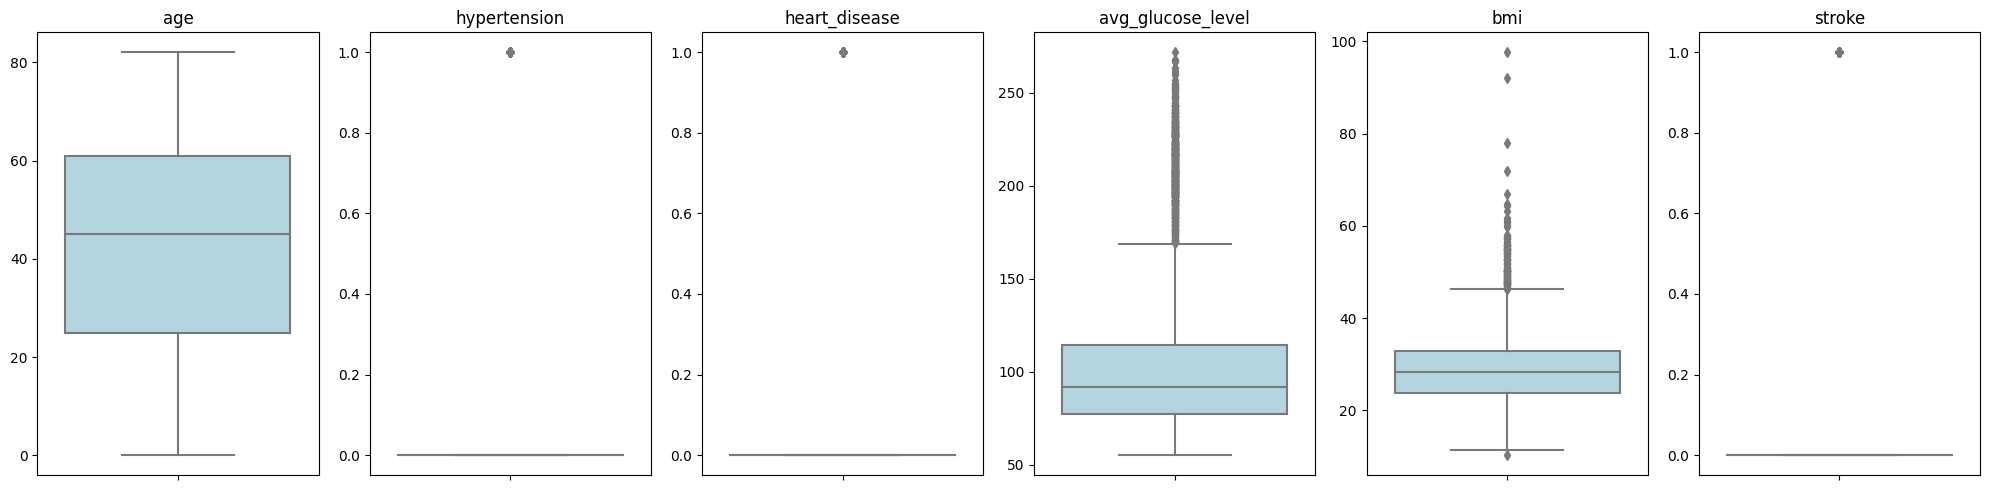

In [17]:
# Select numeric columns
num = df.select_dtypes(include=['int64', 'float64'])

# Create subplots for each numeric variable
fig, axes = plt.subplots(nrows=1, ncols=len(num.columns), figsize=(20,5))

# Loop through each column and create boxplots
for i, col in enumerate(num.columns):
    seaborn.boxplot(y=df[col], ax=axes[i], color='lightblue')
    axes[i].set_title(col)
    axes[i].set_ylabel('')
    
plt.tight_layout()
plt.show()

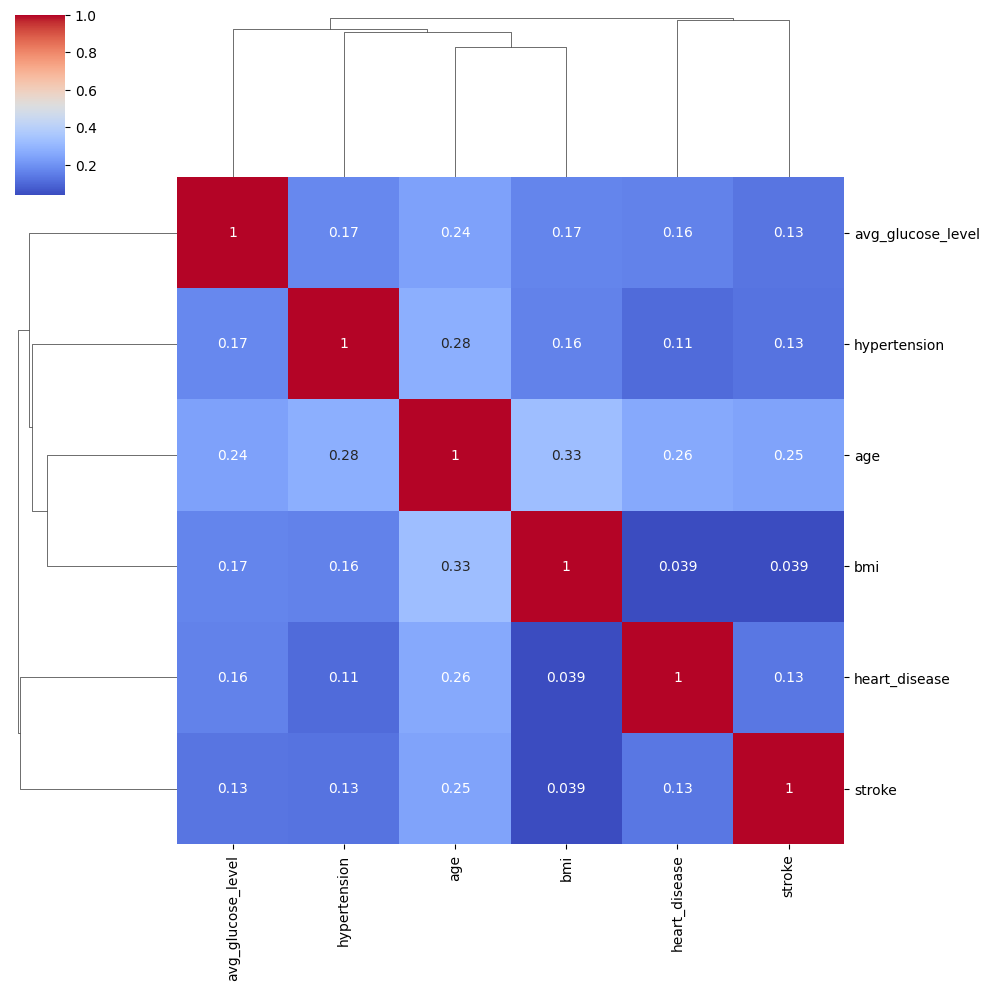

In [18]:
seaborn.clustermap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [19]:
df.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

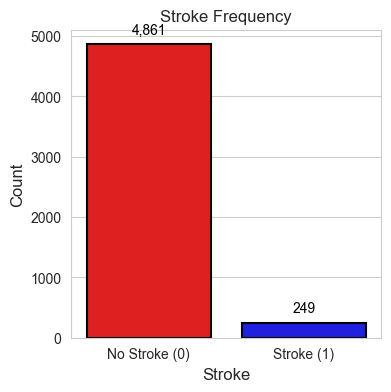

In [20]:
seaborn.set_style("whitegrid")

plt.figure(figsize=(4, 4))

colors = ['red', 'blue']

# creating the bar plot
ax = seaborn.barplot(x=['No Stroke (0)', 'Stroke (1)'], y=df['stroke'].value_counts(), palette=colors, edgecolor='black', linewidth=1.5)

# adding labels and title
plt.title('Stroke Frequency', fontsize=12)
plt.xlabel('Stroke', fontsize=12)
plt.ylabel('Count', fontsize=12)

# adding data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.show()

In [21]:
df.gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [22]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

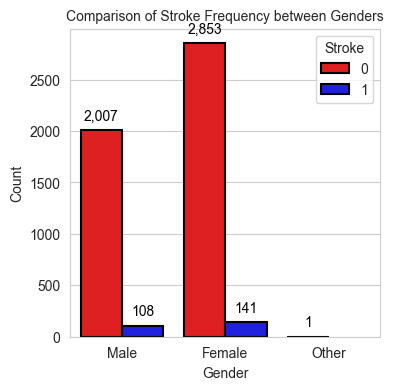

In [23]:
seaborn.set_style("whitegrid")

plt.figure(figsize=(4, 4))

colors = ['red', 'blue']

# creating the count plot
ax = seaborn.countplot(x='gender', hue='stroke', data=df, palette=colors, edgecolor='black', linewidth=1.5)

# adding labels and title
plt.title('Comparison of Stroke Frequency between Genders', fontsize=10)
plt.xlabel('Gender', fontsize=10)
plt.ylabel('Count', fontsize=10)

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

# adding legend
plt.legend(title='Stroke', loc='upper right')

plt.show()

In [24]:
df.ever_married.unique()

array(['Yes', 'No'], dtype=object)

In [25]:
df.ever_married.value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

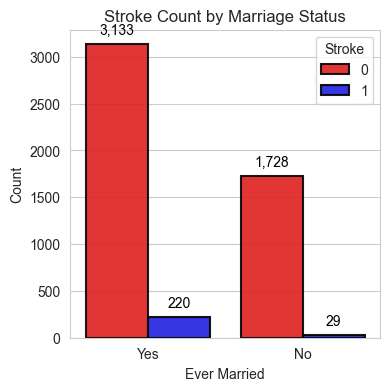

In [26]:
seaborn.set_style("whitegrid")
plt.figure(figsize=(4, 4))
ax = seaborn.countplot(x='ever_married', hue='stroke', data=df, palette=['red','blue'], alpha=0.9, edgecolor='black', linewidth=1.5)
ax.set(title='Stroke Count by Marriage Status', xlabel='Ever Married', ylabel='Count')
ax.legend(title='Stroke', loc='upper right')

# Add data labels to the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,.0f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.show()

In [27]:
df.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [28]:
df.work_type.value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

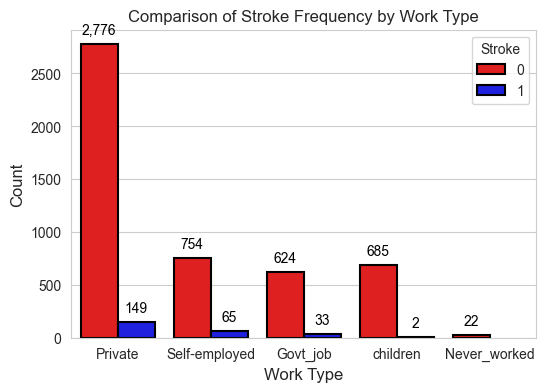

In [29]:
seaborn.set_style("whitegrid")

plt.figure(figsize=(6, 4))

# creating the count plot
ax = seaborn.countplot(x='work_type', hue='stroke', data=df, palette=colors, edgecolor='black', linewidth=1.5)

# adding labels and title
plt.title('Comparison of Stroke Frequency by Work Type', fontsize=12)
plt.xlabel('Work Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

# adding data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

# adding legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['0', '1'], title='Stroke', loc= 'upper right')

plt.show()

In [30]:
df.Residence_type.unique()

array(['Urban', 'Rural'], dtype=object)

In [31]:
df.Residence_type.value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

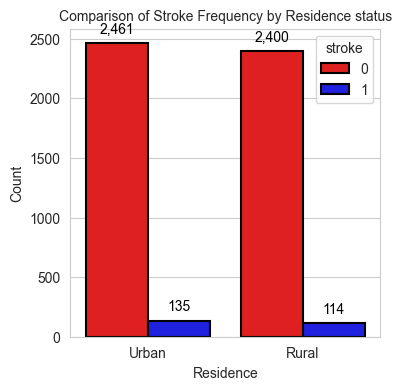

In [32]:
seaborn.set_style("whitegrid")

plt.figure(figsize=(4, 4))

colors = ['red', 'blue']

# creating the bar plot
ax = seaborn.countplot(x='Residence_type', hue='stroke', data=df, palette=colors, edgecolor='black', linewidth=1.5)

# adding labels and title
plt.title('Comparison of Stroke Frequency by Residence status', fontsize=10)
plt.xlabel('Residence', fontsize=10)
plt.ylabel('Count', fontsize=10)

# adding data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.show()

In [33]:
df.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [34]:
df.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

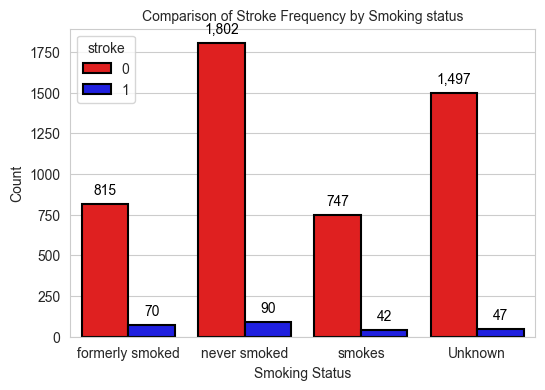

In [35]:
seaborn.set_style("whitegrid")

plt.figure(figsize=(6, 4))

colors = ['red', 'blue']

# creating the bar plot
ax = seaborn.countplot(x='smoking_status', hue='stroke', data=df, palette=colors, edgecolor='black', linewidth=1.5)

# adding labels and title
plt.title('Comparison of Stroke Frequency by Smoking status', fontsize=10)
plt.xlabel('Smoking Status', fontsize=10)
plt.ylabel('Count', fontsize=10)

# adding data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.show()

# Encoding Categorical Variables

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
enc = LabelEncoder()

In [38]:
df['gender'] = enc.fit_transform(df['gender']) 
df['ever_married'] = enc.fit_transform(df['ever_married']) 
df['work_type'] = enc.fit_transform(df['work_type']) 
df['Residence_type'] = enc.fit_transform(df['Residence_type']) 
df['smoking_status'] = enc.fit_transform(df['smoking_status'])

In [39]:
df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0
5109,0,44.0,0,0,1,0,1,85.28,26.200000,0,0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB


In [41]:
df.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893237,1.376908,0.048728
std,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.698018,1.071534,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.400000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x = df.drop(['stroke'],axis=1)
x.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2


In [44]:
y = df['stroke']

In [45]:
y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [46]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.2)

# LogisticRegression

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
X_train.shape

(4088, 10)

In [49]:
X_test.shape

(1022, 10)

In [50]:
model = LogisticRegression()

In [51]:
model.fit(X_train,Y_train)

LogisticRegression()

In [52]:
model.score(X_test,Y_test)

0.9549902152641878

In [53]:
y_pred = model.predict(X_test)

In [54]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [55]:
cm = confusion_matrix(Y_test,y_pred)

In [56]:
cm

array([[976,   1],
       [ 45,   0]])

In [57]:
clf = classification_report(Y_test, y_pred)

In [58]:
print(clf)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       977
           1       0.00      0.00      0.00        45

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.91      0.95      0.93      1022



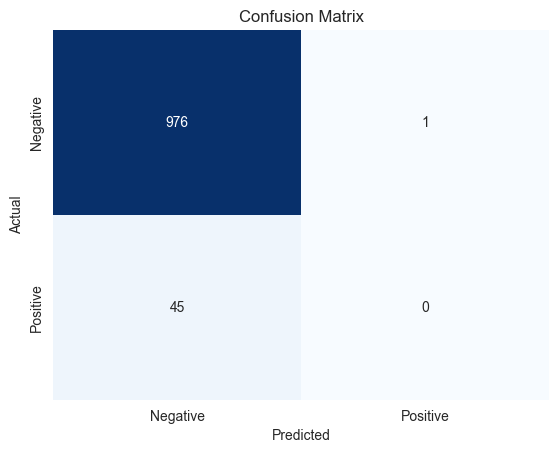

In [59]:
seaborn.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [60]:
print('Accuracy :' , model.score(X_test,Y_test)*100 )

Accuracy : 95.49902152641879


# RandomForest

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
model1 = RandomForestClassifier()

In [63]:
print(model1.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [64]:
model1.fit(X_train,Y_train)

RandomForestClassifier()

In [65]:
y_pred1 = model1.predict(X_test)

In [66]:
model1.score(X_test,Y_test)

0.9549902152641878

In [67]:
clf1 = classification_report(Y_test, y_pred1)

In [68]:
print(clf1)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       977
           1       0.00      0.00      0.00        45

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.91      0.95      0.93      1022



In [69]:
cm1  = confusion_matrix(Y_test,y_pred1)

In [70]:
cm1

array([[976,   1],
       [ 45,   0]])

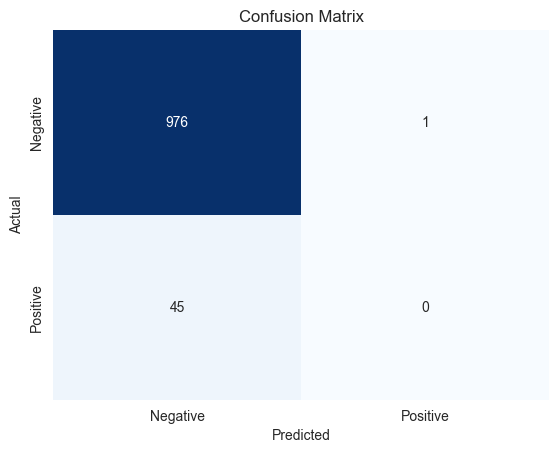

In [71]:
seaborn.heatmap(cm1, annot=True, cmap="Blues", fmt="d", cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [72]:
# Hyperparameter Tuning 

In [73]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [5, 15],
    'min_samples_split': [2, 5],
    'max_features': ['auto', 'sqrt']
}
# performing a grid search over the specified parameter grid
grid_search = GridSearchCV(estimator=model1, param_grid=param_grid, cv=5)

# fiting the gridsearch to the data
grid_search.fit(X_train, Y_train)

# print the best parameters found
print(grid_search.best_params_)

# predicting using the best model
y_pr = grid_search.predict(X_test)

# print the classification report
print(classification_report(Y_test, y_pr))

{'max_depth': 5, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       977
           1       0.00      0.00      0.00        45

    accuracy                           0.96      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.91      0.96      0.93      1022



In [89]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pr)

0.9559686888454012

# KNN

In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [97]:
model2 = KNeighborsClassifier()
print(model2.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [76]:
model2.fit(X_train,Y_train)

KNeighborsClassifier()

In [77]:
y_pred2 = model2.predict(X_test)

In [78]:
model2.score(X_test,Y_test)

0.9481409001956947

In [79]:
clf2 = classification_report(Y_test, y_pred2)

In [80]:
print(clf2)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       977
           1       0.00      0.00      0.00        45

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.91      0.95      0.93      1022



In [81]:
cm2  = confusion_matrix(Y_test,y_pred2)

In [82]:
cm2

array([[969,   8],
       [ 45,   0]])

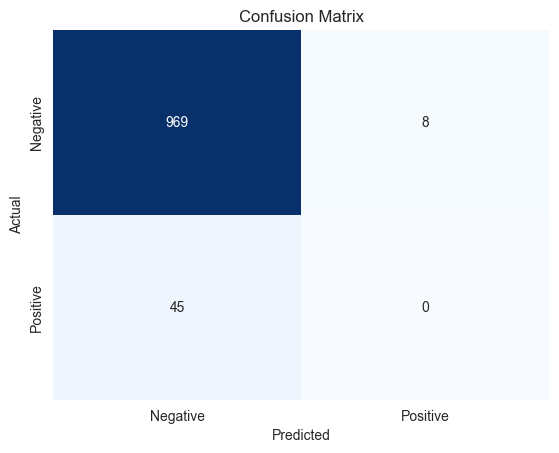

In [83]:
seaborn.heatmap(cm2, annot=True, cmap="Blues", fmt="d", cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [84]:
# Hyperparameter Tuning

In [85]:
parm = {'n_neighbors': [3, 5, 7, 9],
              'weights': ['uniform', 'distance']}

# perform a grid search over the specified parameter grid
grid_search_knn = GridSearchCV(estimator=model2, param_grid=parm, cv=5)

# fit the grid search to the data
grid_search_knn.fit(X_train, Y_train)

# print the best parameters found
print(grid_search_knn.best_params_)

# predict using the best model
y_p = grid_search_knn.predict(X_test)

# print the classification report
print(classification_report(Y_test, y_p))

{'n_neighbors': 9, 'weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       977
           1       0.00      0.00      0.00        45

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.91      0.95      0.93      1022



In [90]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_p)

0.9530332681017613

In [86]:
from sklearn.svm import SVC

In [87]:
model3 = SVC()

In [98]:
print(model3.get_params())

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [91]:
model3

SVC()

In [104]:
model3.fit(X_train,Y_train)

SVC()

In [105]:
y_pred3 = model3.predict(X_test)

In [106]:
model3.score(X_test,Y_test)

0.9559686888454012

In [107]:
clf3 = classification_report(Y_test, y_pred3)

In [109]:
print(clf3)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       977
           1       0.00      0.00      0.00        45

    accuracy                           0.96      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.91      0.96      0.93      1022



In [110]:
cm3 = confusion_matrix(Y_test,y_pred3)

In [111]:
cm3

array([[977,   0],
       [ 45,   0]])

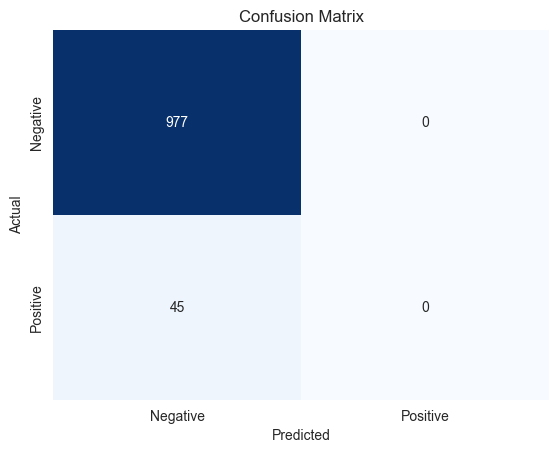

In [112]:
seaborn.heatmap(cm3, annot=True, cmap="Blues", fmt="d", cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Hyperparameter Tuning

In [115]:
params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
}
# perform a grid search over the specified parameter grid
grid_search_svm = GridSearchCV(estimator=model3, param_grid=params, cv=5)

# fit the grid search to the data
grid_search_svm.fit(X_train, Y_train)

# print the best parameters found
print(grid_search_svm.best_params_)

# predict using the best model
y_pd = grid_search_svm.predict(X_test)

# print the classification report
print(classification_report(Y_test, y_pd))

{'C': 0.1, 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       977
           1       0.00      0.00      0.00        45

    accuracy                           0.96      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.91      0.96      0.93      1022



# Comparing Accuracies of all the models

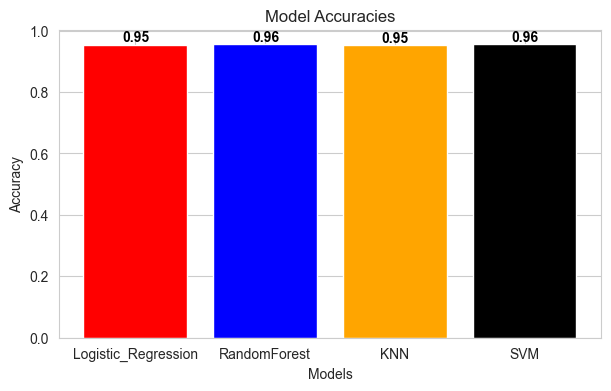

In [122]:
models = ['Logistic_Regression', 'RandomForest', 'KNN', 'SVM']
accuracies = [accuracy_score(Y_test,y_pred), accuracy_score(Y_test,y_pr), accuracy_score(Y_test,y_p), accuracy_score(Y_test,y_pd)]

# set up the bar plot
plt.figure(figsize=(7,4))
plt.bar(models, accuracies, color=['red','blue','orange','black'])

# add title and labels
plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')

# add the accuracies as text labels on top of the bars
for i, v in enumerate(accuracies):
    plt.text(i-0.1, v+0.01, str(round(v,2)), color='black', fontweight='bold')

# show the plot
plt.show()